# Listing 3.1 Loading the IMDB dataset

In [4]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)


17464789/17464789 [==============================] - 11s 1us/step


In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_labels[0]

1

In [9]:
max([max(sequence) for sequence in train_data])

9999

In [10]:
 word_index = imdb.get_word_index()

1641221/1641221 [==============================] - 1s 1us/step


In [20]:
reverse_word_index=dict(
[(value,key) for (key,value) in word_index.items()])
decode_review = ' '.join(
[reverse_word_index.get(i-3,'?') for i in train_data[0]])

# Listing 3.2 Encoding the integer sequences into a binary matrix


In [22]:
import numpy as np

def victorize_sequences(sequences, dimension=10000):
    results =np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

x_train=victorize_sequences(train_data)
x_test =victorize_sequences(test_data)


array([0., 1., 1., ..., 0., 0., 0.])

In [23]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [24]:
#  You should also vectorize your labels, which is straightforward:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

# Listing 3.3 The model definition

In [27]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


In [29]:
model.compile(optimizer ='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Listing 3.5 Configuring the optimizer

In [30]:
this is custom optimizer
# from keras import optimizers
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#  loss='binary_crossentropy',
#  metrics=['accuracy'])

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\legacy\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


# Listing 3.6 Using custom losses and metric

In [31]:
# Custimize way of loss and metrices
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
               metrics=[metrics.binary_accuracy])

# Listing 3.7 Setting aside a validation set

In [33]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Listing 3.8 Training your model

In [42]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 17s 516ms/step - loss: 0.0153 - acc: 0.9975 - val_loss: 0.5682 - val_acc: 0.8701
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0102 - acc: 0.9992 - val_loss: 0.5952 - val_acc: 0.8697
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0104 - acc: 0.9984 - val_loss: 0.6188 - val_acc: 0.8690
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0084 - acc: 0.9984 - val_loss: 0.6547 - val_acc: 0.8642
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0046 - acc: 0.9999 - val_loss: 0.6687 - val_acc: 0.8676
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0101 - acc: 0.9978 - val_loss: 0.6797 - val_acc: 0.8679
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0032 - acc: 0.9999 - val_loss: 0.6978 - val_acc: 0.8659
Epoch 8/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0072 -

In [43]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

# Listing 3.9 Plotting the training and validation loss

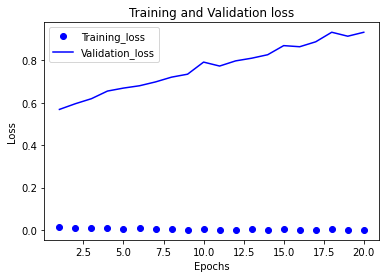

In [47]:
import matplotlib.pyplot as plt

history_dict =history.history
loss_values =history_dict['loss']
val_loss_values=history_dict['val_loss']
acc= history_dict['acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs,loss_values,'bo',label='Training_loss')
plt.plot(epochs,val_loss_values,'b',label='Validation_loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Listing 3.10 Plotting the training and validation accuracy

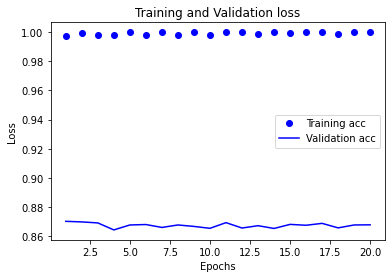

In [49]:
plt.clf()
acc_values=history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Listing 3.11 Retraining a model from scratch


In [52]:
model= models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer ='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

model.fit(x_train,y_train,epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 6s 25ms/step - loss: 0.4971 - acc: 0.8022
Epoch 2/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2924 - acc: 0.9014
Epoch 3/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2257 - acc: 0.9210
Epoch 4/4
782/782 [==============================] - 4s 4ms/step - loss: 0.3018 - acc: 0.8784


In [53]:
results

[0.3017926514148712, 0.8783599734306335]

In [54]:
model.predict(x_test)

782/782 [==============================] - 46s 4ms/step


array([[0.17705637],
       [0.9998563 ],
       [0.53530055],
       ...,
       [0.08417322],
       [0.06536047],
       [0.3512119 ]], dtype=float32)

#  Classifying newswires: 
a multiclass classification example

## Listing 3.12 Loading the Reuters dataset

In [95]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)


In [96]:
len(train_data)

8982

In [97]:
len(test_data)

2246

In [98]:
train_data[1]

[1,
 3267,
 699,
 3434,
 2295,
 56,
 2,
 7511,
 9,
 56,
 3906,
 1073,
 81,
 5,
 1198,
 57,
 366,
 737,
 132,
 20,
 4093,
 7,
 2,
 49,
 2295,
 2,
 1037,
 3267,
 699,
 3434,
 8,
 7,
 10,
 241,
 16,
 855,
 129,
 231,
 783,
 5,
 4,
 587,
 2295,
 2,
 2,
 775,
 7,
 48,
 34,
 191,
 44,
 35,
 1795,
 505,
 17,
 12]

## Listing 3.13 Decoding newswires back to text

In [99]:
word_index = reuters.get_word_index()
reverse_word_index =dict([(value,key) for (key,value) in word_index.items()])
decode_newswire=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [100]:
train_labels[12]

4

## Listing 3.14 Encoding the data

In [111]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results =np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1
        return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)



x_train type: <class 'numpy.ndarray'>
x_train sample: [[0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [112]:
def to_one_hot(labels,dimension=46):
    results =np.zeros((len(labels),dimension))
    for i, label in enumerate(labels):
        results[i,label]=1.
        return results
one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels =to_one_hot(test_labels)
# Below is the buit in way of keras one hot encoding mean from word to number
# from keras.utils.np_utils import to_categorical
#  one_hot_train_labels = to_categorical(train_labels)
#  one_hot_test_labels = to_categorical(test_labels)

## Listing 3.15 Model definition

In [113]:
# In the previous
#  example, you used 16-dimensional intermediate layers, but a 16-dimensional space may
#  be too limited to learn to separate 46 different classes: such small layers may act as infor
# mation bottlenecks, permanently dropping relevant information.
#  For this reason you’ll use larger layers. Let’s go with 64 units.
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

#  The best loss function to use in this case is categorical_crossentropy. It measures
#  the distance between two probability distributions: here, between the probability dis
# tribution output by the network and the true distribution of the labels. By minimizing
#  the distance between these two distributions, you train the network to output some
# thing as close as possible to the true labels.
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acc'])

# Validating your approach
 Let’s set apart 1,000 samples in the training data to use as a validation set.

## Listing 3.17 Setting aside a validation set

In [114]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


##  Now, let’s train the network for 20 epochs.
 Listing 3.18 Training the model

In [115]:
history =model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 6s 251ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 0.9990
Epoch 2/20
16/16 [==============================] - 1s 53ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 0.9990
Epoch 3/20
16/16 [==============================] - 1s 53ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 0.9990
Epoch 4/20
16/16 [==============================] - 1s 52ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 0.9990
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 0.9990
Epoch 6/20
16/16 [==============================] - 1s 55ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 0.9990
Epoch 7/20
16/16 [==============================] - 1s 76ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 0.9990
Epoch 8/20
16/16 [==============================] - 1s

## Listing 3.19 Plotting the training and validation loss

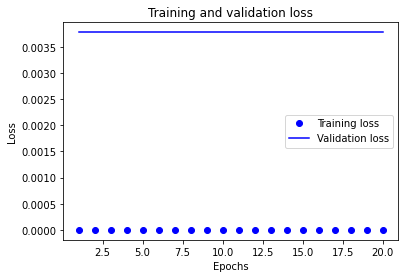

In [116]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss= history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Listing 3.20 Plotting the training and validation accuracy

In [117]:
plt.clf()

<Figure size 432x288 with 0 Axes>

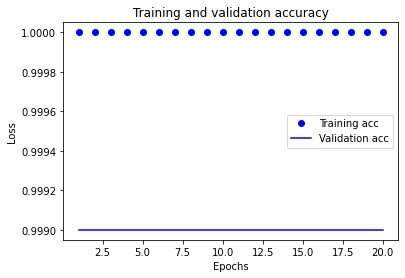

In [118]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Listing 3.21 Retraining a model from scratch

In [119]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 9s 108ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 0.9990
Epoch 2/9
16/16 [==============================] - 1s 61ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 0.9990
Epoch 3/9
16/16 [==============================] - 1s 60ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 0.9990
Epoch 4/9
16/16 [==============================] - 1s 57ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 0.9990
Epoch 5/9
16/16 [==============================] - 1s 59ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 0.9990
Epoch 6/9
16/16 [==============================] - 1s 69ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 0.9990
Epoch 7/9
16/16 [==============================] - 1s 70ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy

In [120]:
results

[0.0017198349814862013, 0.9995547533035278]

In [121]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18655387355298308

## Listing 3.22 Generating predictions for new data

In [122]:
predictions =model.predict(x_test)

71/71 [==============================] - 0s 5ms/step


In [123]:
predictions[0].shape

(46,)

In [124]:
np.sum(predictions[0])

1.0

In [125]:
np.argmax(predictions[0])

20

In [126]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [127]:
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['acc'])

## The importance of having sufficiently large intermediate layers
 We mentioned earlier that because the final outputs are 46-dimensional, you should
 avoid intermediate layers with many fewer than 46 hidden units. Now let’s see what
 happens when you introduce an information bottleneck by having intermediate layers
 that are significantly less than 46-dimensional: for example, 4-dimensional

## Listing 3.23 A model with an information bottleneck

In [128]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 4s 34ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 0.9990
Epoch 2/20
63/63 [==============================] - 2s 27ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 0.9990
Epoch 3/20
63/63 [==============================] - 2s 24ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 0.9990
Epoch 4/20
63/63 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 0.9990
Epoch 5/20
63/63 [==============================] - 2s 27ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 0.9990
Epoch 6/20
63/63 [==============================] - 1s 22ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 0.9990
Epoch 7/20
63/63 [==============================] - 1s 22ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0038 - val_ac

# Predicting house prices: a regression example
 The two previous examples were considered classification problems, where the goal
 was to predict a single discrete label of an input data point. Another common type of
 machine-learning problem is regression, which consists of predicting a continuous
 value instead of a discrete label: for instance, predicting the temperature tomorrow,
 given meteorological data; or predicting the time that a software project will take to
 complete, given its specifications.
 NOTE Don’t confuse regression and the algorithm logistic regression. Con
fusingly, logistic regression isn’t a regression algorithm—it’s a classification
 algorithm.

## Listing 3.24 Loading the Boston housing dataset

In [130]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 4us/step


In [131]:
train_data.shape

(404, 13)

In [132]:
test_data.shape

(102, 13)

### Preparing the data
 It would be problematic to feed into a neural network values that all take wildly differ
ent ranges. The network might be able to automatically adapt to such heterogeneous
 data, but it would definitely make learning more difficult. A widespread best practice
 to deal with such data is to do feature-wise normalization: for each feature in the input
 data (a column in the input data matrix), you subtract the mean of the feature and
 divide by the standard deviation, so that the feature is centered around 0 and has a
 unit standard deviation. This is easily done in Numpy.

### Listing 3.25 Normalizing the data

In [133]:
mean = train_data.mean(axis=0)
train_data-= mean
std = train_data.std(axis=0)
train_data /= std
test_data-= mean
test_data /= std

### Listing 3.26 Model definition

In [139]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

### Listing 3.27 K-fold validation


In [143]:
import numpy as np

k = 4  # Number of folds for cross-validation
num_val_samples = len(train_data) // k  # Samples per fold for validation
num_epochs = 100  # Number of training epochs for each fold
all_scores = []  # List to store evaluation scores from each fold

# Perform k-fold cross-validation
for i in range(k):
    print('processing fold #', i)
    
    # Prepare the validation data: the i-th segment of the training data
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    # Prepare the training data: all data except the i-th validation fold
    partial_train_data = np.concatenate([
        train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]
    ], axis=0)
    
    partial_train_targets = np.concatenate([
        train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]
    ], axis=0)
    
    # Build a fresh model instance for the current fold
    model = build_model()
    
    # Train the model on the partial training data for a fixed number of epochs
    model.fit(
        partial_train_data,
        partial_train_targets,
        epochs=num_epochs,
        batch_size=1,
        verbose=0  # Suppress per-epoch output for cleaner logs
    )
    
    # Evaluate the model on the validation data and collect the mean absolute error (MAE)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


### Listing 3.28 Saving the validation logs at each fold

In [147]:
import numpy as np

num_epochs = 500
all_mae_histories = []

for i in range(k):
    print(f'Processing fold #{i}')

    # ——————————————
    # 1) Select out the validation slice for this fold
    # ——————————————
    start = i * num_val_samples
    end   = (i + 1) * num_val_samples

    val_data    = train_data[start:end]
    val_targets = train_targets[start:end]

    # ——————————————
    # 2) Build the training set by stacking the other slices
    # ——————————————
    partial_train_data = np.concatenate([
        train_data[:start],
        train_data[end:]
    ], axis=0)

    partial_train_targets = np.concatenate([
        train_targets[:start],
        train_targets[end:]
    ], axis=0)

    # ——————————————
    # 3) Build a fresh model, train it, and record its history
    # ——————————————
    model = build_model()  # your model‑building function
    history = model.fit(
        partial_train_data,
        partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs,
        batch_size=1,
        verbose=0
    )

    # ——————————————
    # 4) Extract the validation MAE for each epoch
    # ——————————————
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)


Processing fold #0


KeyError: 'val_mean_absolute_error'

### Listing 3.29 Building the history of successive mean K-fold validation score

In [ ]:
average_mae_history = [
 np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

### Listing 3.30 Plotting validation scores

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

### Listing 3.31 Plotting validation scores, excluding the first 10 data points

In [ ]:
import matplotlib.pyplot as plt

def smooth_curve(points, factor=0.9):
    """
    Given a list of numeric points, return a new list where each point
    (after the first) is a weighted average of the previous smoothed
    point and the current raw point.

    Args:
        points (list of float): the original sequence to smooth.
        factor (float, default=0.9): smoothing factor between 0 and 1.
            Closer to 1 → heavier smoothing (slower response to changes);
            closer to 0 → less smoothing.

    Returns:
        list of float: the smoothed sequence, same length as `points`.
    """
    smoothed_points = []
    for point in points:
        if smoothed_points:
            # Take the last smoothed value...
            previous = smoothed_points[-1]
            # ...and mix it with the new raw point
            smoothed_value = previous * factor + point * (1 - factor)
            smoothed_points.append(smoothed_value)
        else:
            # First point is copied unchanged
            smoothed_points.append(point)
    return smoothed_points

# Suppose `average_mae_history` is a list of per-epoch MAE averaged
# across folds. We typically drop the first few epochs (where values
# can be volatile) before plotting.
start_epoch = 10
smooth_mae_history = smooth_curve(average_mae_history[start_epoch:])

# Plot the smoothed validation MAE curve
plt.plot(
    range(1, len(smooth_mae_history) + 1),
    smooth_mae_history
)
plt.xlabel('Epochs (after dropping first 10)')
plt.ylabel('Validation MAE (smoothed)')
plt.title('Smoothed Validation MAE over Epochs')
plt.show()


### Listing 3.32 Training the final model

In [ ]:
model = build_model()
 model.fit(train_data, train_targets,
 epochs=80, batch_size=16, verbose=0)
     test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)